In [1]:
import numpy as np
import pandas as pd
import jscatter
import h5py
import os
import matplotlib.pylab as plt
import matplotlib.gridspec as gridspec
import logomaker

In [2]:
data_dir = "/oak/stanford/groups/akundaje/atwang/gp_mouse_sc_analyses/results/assembly_2/mm10/modisco_seqlet_occurences_downsampled/endothelial_cell"
data_path = os.path.join(data_dir, "occurences_annotated.tsv")
names_path = os.path.join(data_dir, "seqlet_names.txt")

In [3]:
data = pd.read_csv(data_path, sep='\t', header=0)
data

,chr_x,start_x,end_x,1,2_x,3_x,4_x,5_x,6_x,summit_x,...,xs.pos.pattern_5,xs.pos.pattern_50,xs.pos.pattern_51,xs.pos.pattern_52,xs.pos.pattern_53,xs.pos.pattern_54,xs.pos.pattern_6,xs.pos.pattern_7,xs.pos.pattern_8,xs.pos.pattern_9
0,chr1,3121337,3121796,total_peak_140,588,.,12.41760,58.87260,56.37410,229,...,0,0,0,0,0,0,0,0,0,0
1,chr1,3191533,3192041,total_peak_141a,36,.,2.48353,3.60957,1.94164,119,...,0,0,0,0,0,0,0,0,0,0
2,chr1,3191533,3192041,total_peak_141b,335,.,8.60956,33.52660,31.23600,348,...,0,0,0,0,0,0,0,0,0,0
3,chr1,3360964,3361276,total_peak_143,119,.,4.63592,11.92300,9.94400,108,...,0,0,0,0,0,0,0,0,0,0
4,chr1,3670569,3670973,total_peak_146,394,.,7.10173,39.47270,37.12530,260,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159576,JH584304.1,101687,101902,total_peak_129,1212,.,3.24063,121.23100,118.43100,101,...,0,0,0,0,0,0,0,0,0,0
159577,JH584304.1,103144,103422,total_peak_130,3552,.,5.33690,355.22000,351.90000,164,...,0,0,0,0,0,0,0,0,0,0
159578,JH584304.1,103769,104115,total_peak_131,15200,.,12.45700,1520.09000,1514.58000,106,...,0,0,0,0,0,0,0,0,0,0
159579,JH584304.1,104202,104357,total_peak_132,2185,.,4.17417,218.51700,215.45800,81,...,0,0,0,0,0,0,0,0,0,0


In [4]:
with open(names_path) as f:
    names = [line.rstrip("\n") for line in f]
names[:5]

['ss.pos.pattern_0',
 'ss.pos.pattern_1',
 'ss.pos.pattern_10',
 'ss.pos.pattern_11',
 'ss.pos.pattern_12']

In [5]:
from scipy.stats import mannwhitneyu

In [6]:
def calc_lfc(df, pattern):
    hits = df[pattern].to_numpy() > 0
    counts_score = np.abs(df["diff_mean_qn"].to_numpy())
    shap_score = df["contrib_counts_e_dist"].to_numpy()
    
    counts_lfc = np.log10(counts_score[hits].mean()) - np.log10(counts_score[~hits].mean())
    shap_lfc = np.log10(shap_score[hits].mean()) - np.log10(shap_score[~hits].mean())

    _, counts_p = mannwhitneyu(counts_score[hits], counts_score[~hits])
    _, shap_p = mannwhitneyu(shap_score[hits], shap_score[~hits])

    counts_nlp = -np.log10(counts_p)
    shap_nlp = -np.log10(shap_p)

    return counts_lfc, shap_lfc, counts_nlp, shap_nlp


In [7]:
from IPython.display import display


In [8]:
records = []
for n in names:
    counts_lfc, shap_lfc, counts_nlp, shap_nlp = calc_lfc(data, n)
    # print(n, counts_lfc, shap_lfc)
    records.append((n, counts_lfc, shap_lfc, counts_nlp, shap_nlp),)
    
scores = pd.DataFrame.from_records(records, columns=['pattern', 'counts_lfc', 'shap_lfc', 'counts_nlp', 'shap_nlp'])
scores = scores.sort_values(by=['shap_nlp'], ascending=False)
with pd.option_context('display.max_rows', 1000):
    display(scores)


/tmp/ipykernel_2203/3756136185.py:12: RuntimeWarning: divide by zero encountered in log10
  counts_nlp = -np.log10(counts_p)
/tmp/ipykernel_2203/3756136185.py:13: RuntimeWarning: divide by zero encountered in log10
  shap_nlp = -np.log10(shap_p)


,pattern,counts_lfc,shap_lfc,counts_nlp,shap_nlp
34,ss.pos.pattern_4,-0.466250,-0.067860,inf,inf
117,xs.pos.pattern_6,-0.361038,-0.051942,inf,inf
4,ss.pos.pattern_12,0.361351,0.112725,225.150701,inf
45,ss.pos.pattern_5,0.361596,0.132021,inf,inf
100,xs.pos.pattern_4,-0.345478,-0.054068,inf,inf
89,xs.pos.pattern_3,-0.215472,-0.039483,inf,inf
56,ss.pos.pattern_6,-0.463148,-0.063198,inf,inf
78,xs.pos.pattern_2,0.086456,-0.028040,162.488065,inf
23,ss.pos.pattern_3,-0.304445,-0.048460,inf,inf
67,xs.pos.pattern_1,-0.037138,-0.052284,1.875312,inf


In [9]:
import seaborn as sns
sns.set()

In [10]:
def plot_pattern(pattern):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5), dpi=200)

    g = sns.scatterplot(data=data, x="diff_mean_qn", y="contrib_counts_e_dist", hue=pattern, s=3, edgecolor=None, hue_norm=(0,2), alpha=0.6, ax=ax1)
    g = sns.scatterplot(data=data, x="ss_mean", y="xs_mean", hue=pattern, s=3, edgecolor=None, hue_norm=(0,2), alpha=0.6, ax=ax2)

/users/atwang/miniconda3/envs/gp_mouse_genome_transfer_notebooks/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


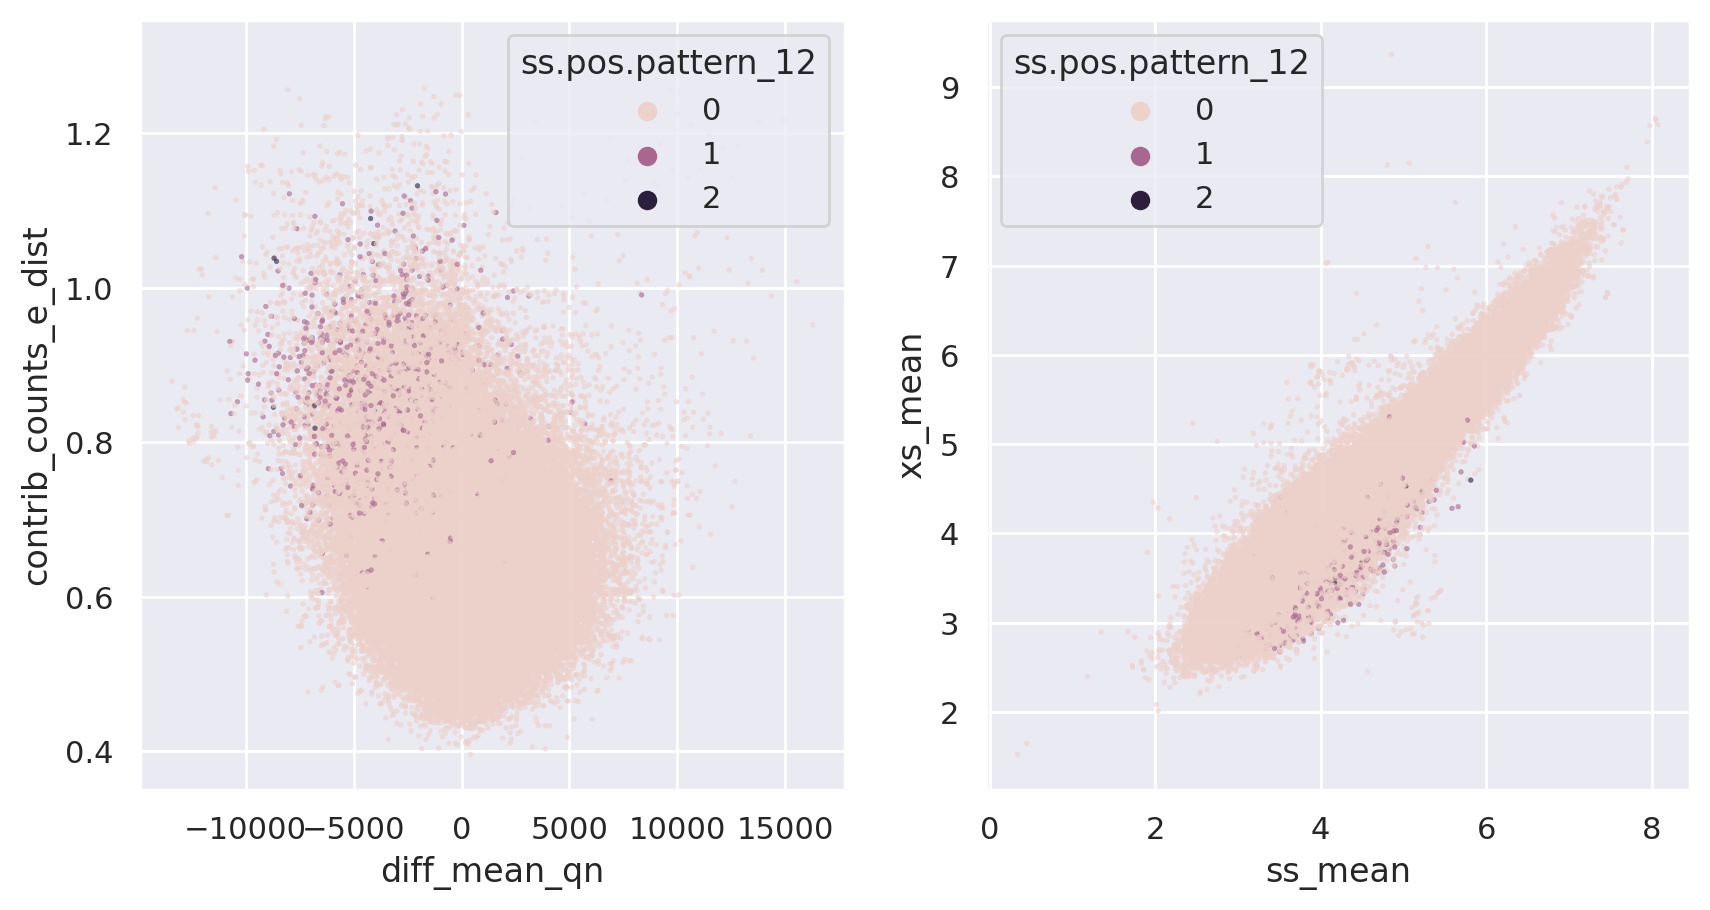

In [11]:
plot_pattern("ss.pos.pattern_12")


/users/atwang/miniconda3/envs/gp_mouse_genome_transfer_notebooks/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/users/atwang/miniconda3/envs/gp_mouse_genome_transfer_notebooks/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


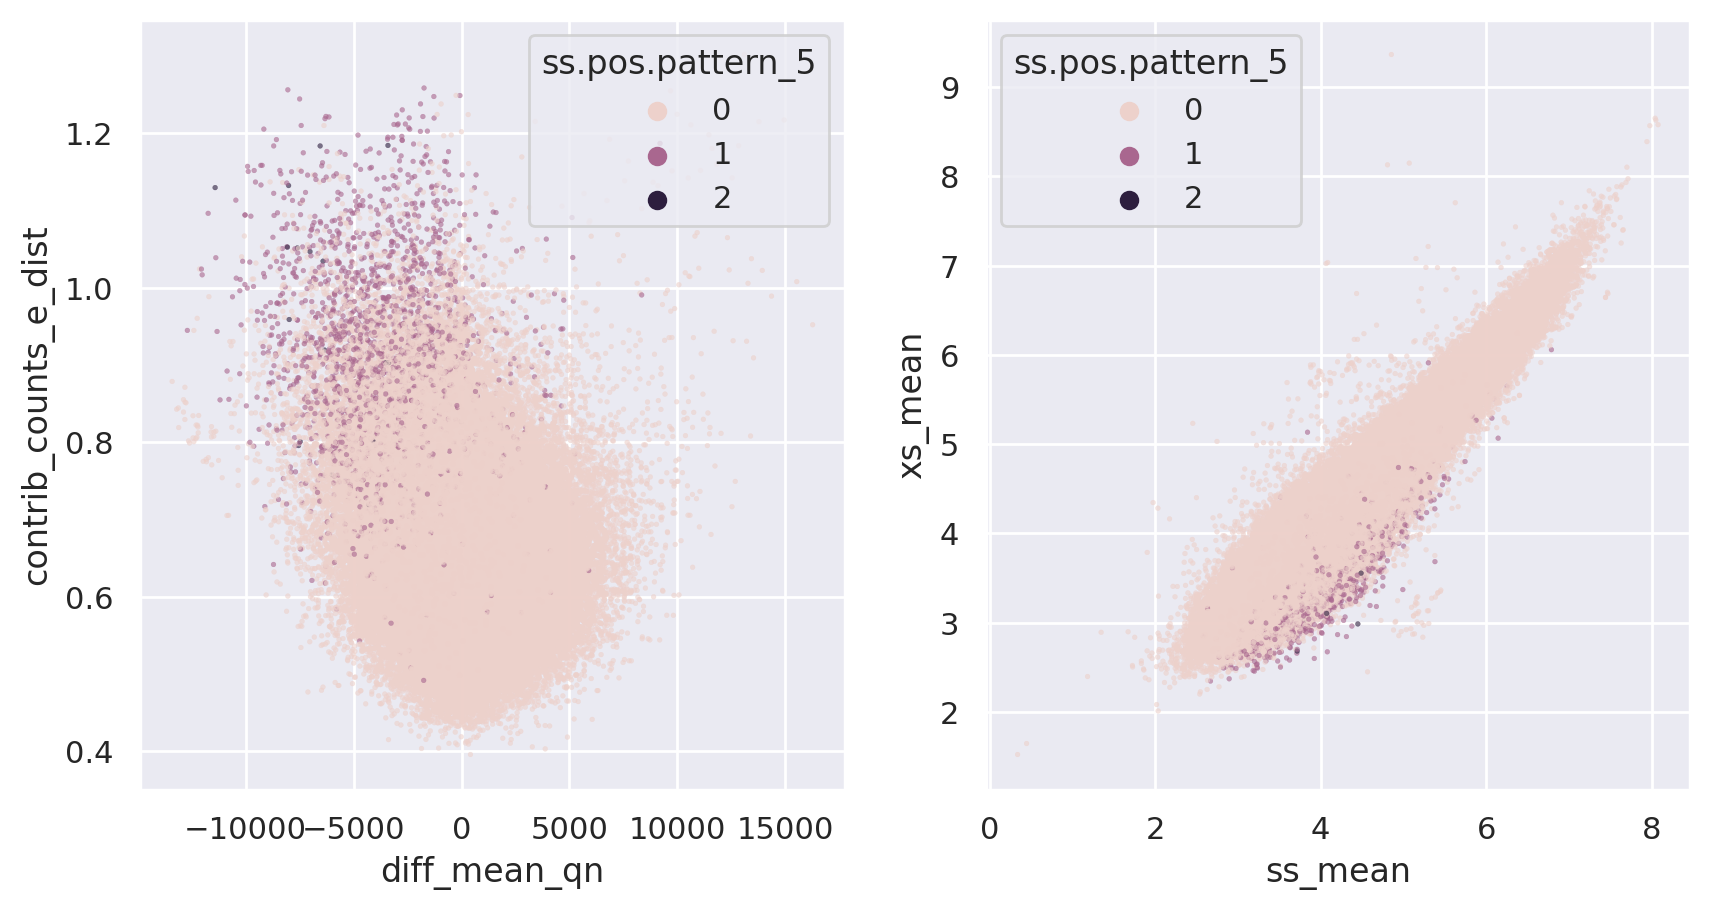

In [12]:
plot_pattern("ss.pos.pattern_5")


/users/atwang/miniconda3/envs/gp_mouse_genome_transfer_notebooks/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/users/atwang/miniconda3/envs/gp_mouse_genome_transfer_notebooks/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


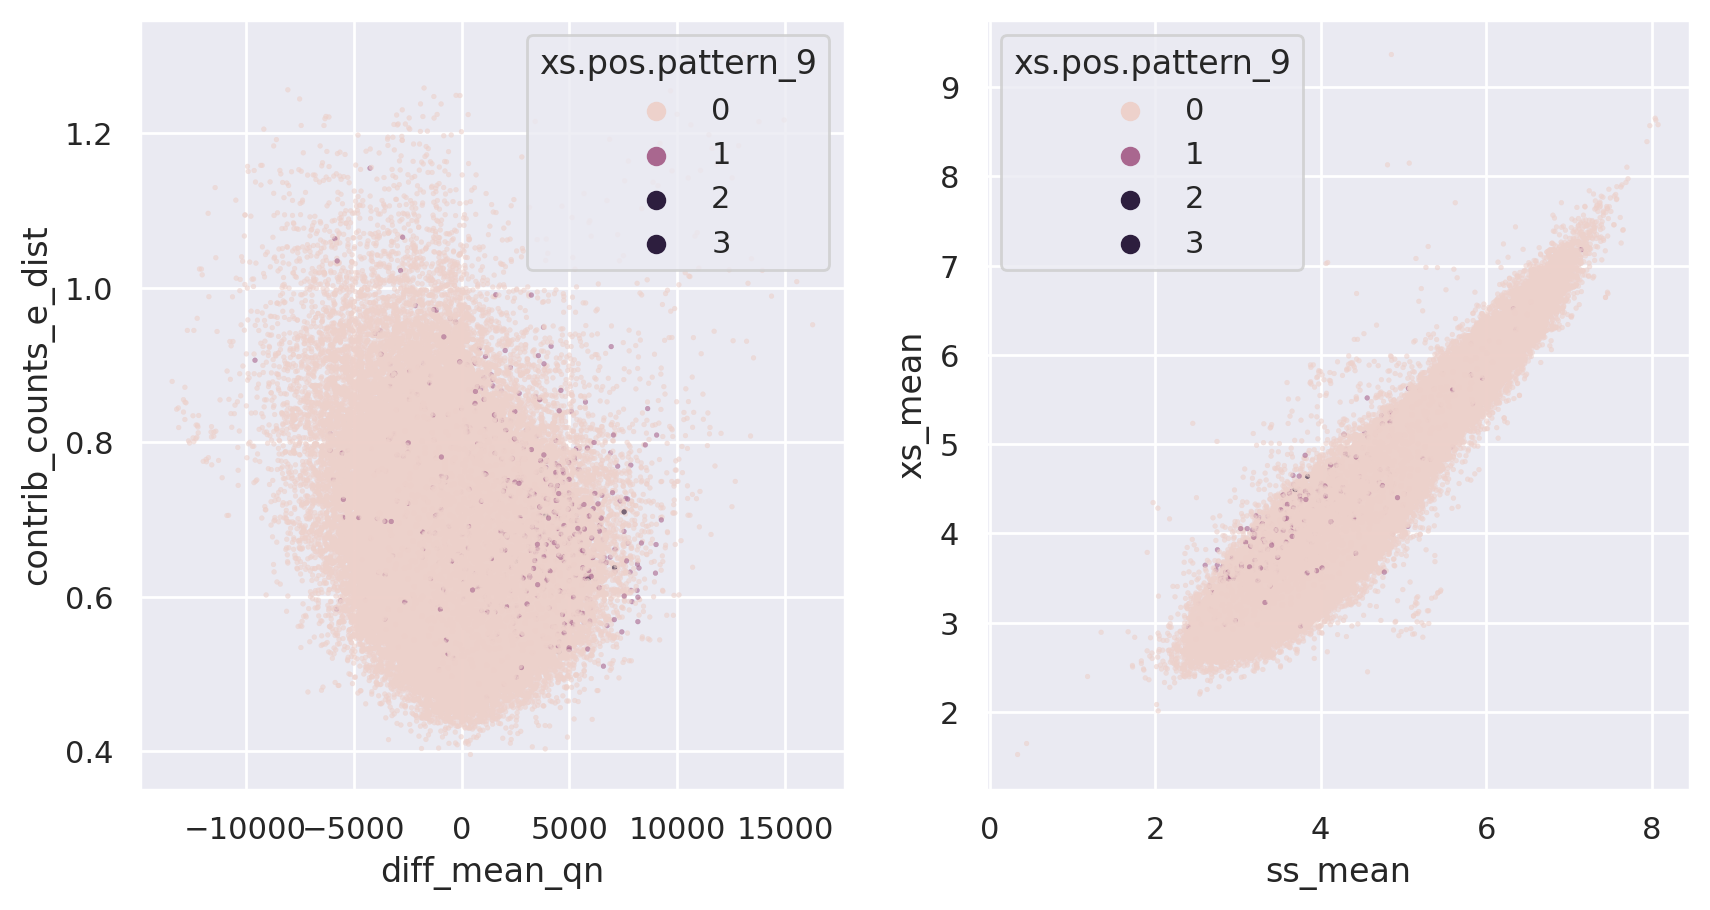

In [13]:
plot_pattern("xs.pos.pattern_9")



/users/atwang/miniconda3/envs/gp_mouse_genome_transfer_notebooks/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/users/atwang/miniconda3/envs/gp_mouse_genome_transfer_notebooks/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


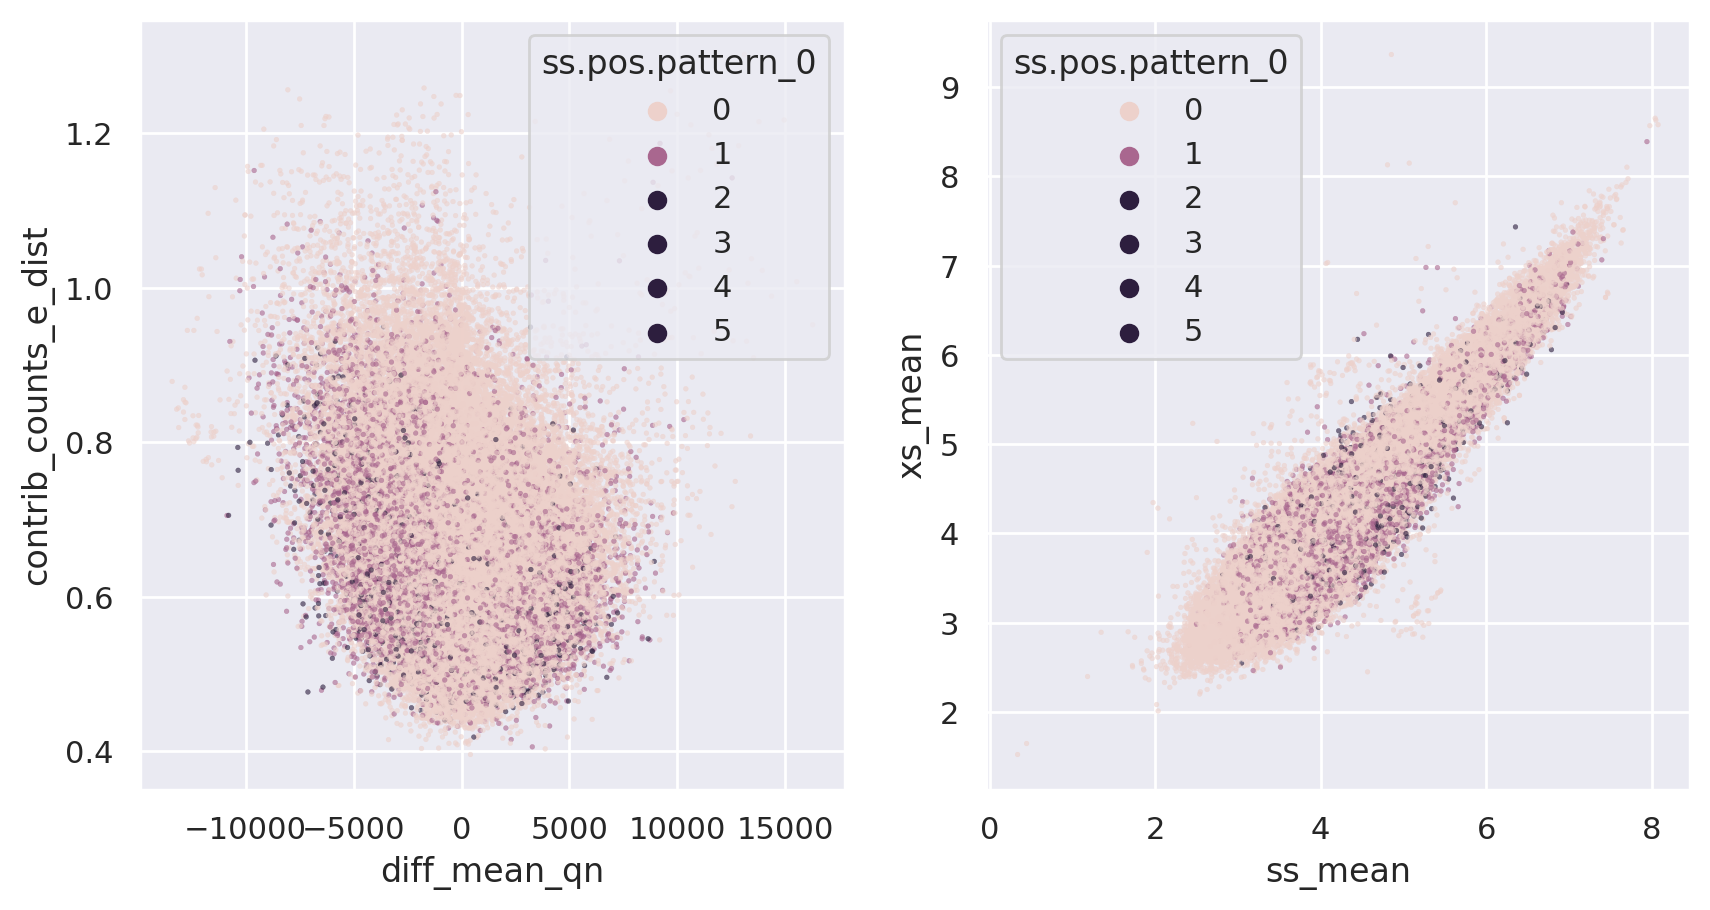

In [14]:
plot_pattern("ss.pos.pattern_0")
